In [ ]:
import cv2
import numpy as np
from aux_functions import *
import matplotlib.pyplot as plt
from snake import Snake2D, SnakeParams

(450, 600)


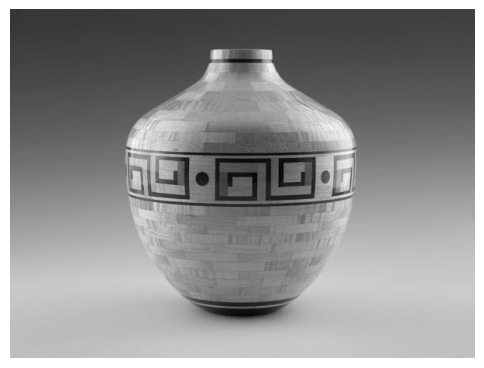

In [2]:
vase_image_path = "./imgs/vase.png"
vase = cv2.imread(vase_image_path, 0)
print(vase.shape)
plt.figure(figsize=(6, 6))
plt.imshow(vase, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (442, 2)


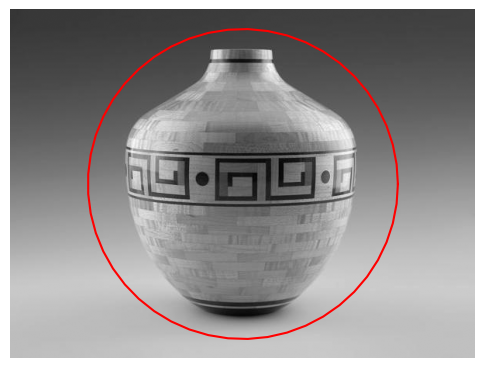

In [ ]:
initial_points1 = [
    [150, 110],
    [325, 90],
    [437, 115],
    [690, 70],
    [770, 231],
    [750, 710],
    [437, 760],
    [150, 730],
    [65, 372],
    [150, 110],
]

initial_points2 = [
    [50, 50],
    [50, 780],
    [780, 780],
    [780, 50],
]

V_circle = init_circle((vase.shape[1] // 2, vase.shape[0] // 2), 200, num_points=50)

V_subdivided = subdivision(V_circle, k=3)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided

# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(vase, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()

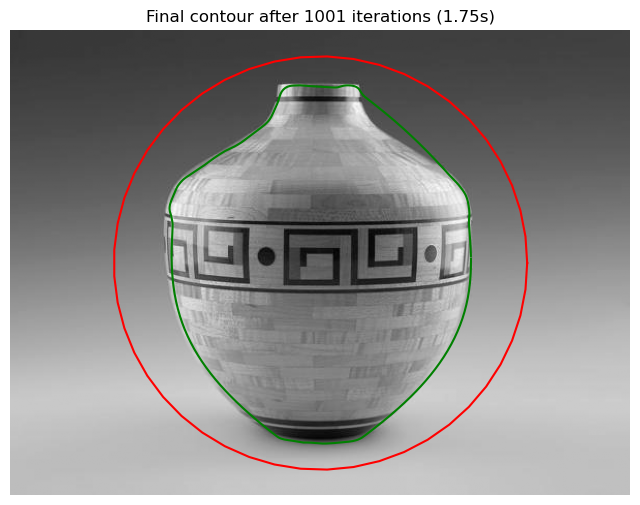

In [ ]:
# Configure snake parameters
vase_params = SnakeParams(
    alpha=2000.0,  # Stronger continuity
    beta=1000.0,  # Stronger curvature
    gamma=0.001,  # Smaller time step
    sigma=3.5,  # Less blur
    kb=-50.0,  # Weaker balloon force
    sb=100.0,  # More smoothing
    max_iter=1000,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=15,
    vfc_sigma=4.0,
)

# Create and evolve snake
vase_snake = Snake2D(vase, v_init, vase_params)
v_final, iters, duration = vase_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(vase, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

(886, 886)


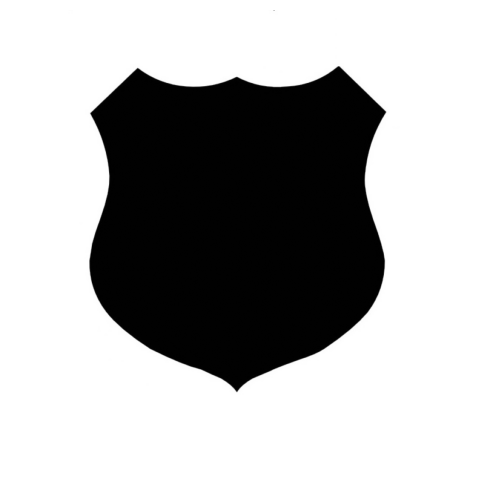

In [5]:
# Load and display image
shield_image_path = "./imgs/shield.png"
shield = cv2.imread(shield_image_path, 0)  # Read as grayscale
print(shield.shape)
plt.figure(figsize=(6, 6))
plt.imshow(shield, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (1177, 2)


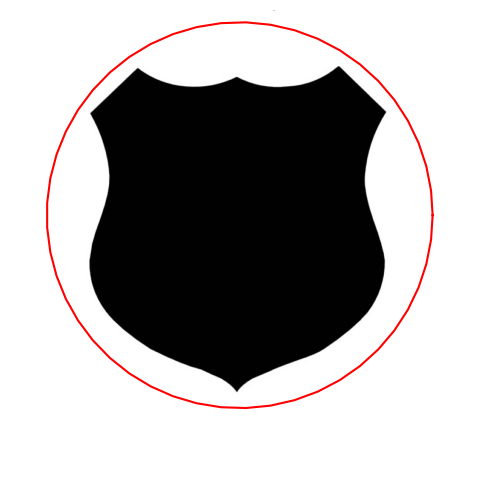

In [ ]:
initial_points1 = [
    [150, 110],
    [325, 90],
    [437, 115],
    [690, 70],
    [770, 231],
    [750, 710],
    [437, 760],
    [150, 730],
    [65, 372],
    [150, 110],
]

initial_points2 = [
    [75, 75],
    [75, 755],
    [755, 755],
    [755, 75],
]


V_circle = init_circle(
    (shield.shape[1] // 2 - 3, shield.shape[0] // 2 - 50), 370, num_points=50
)
V_subdivided = subdivision(V_circle, k=2)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided
# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(shield, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()

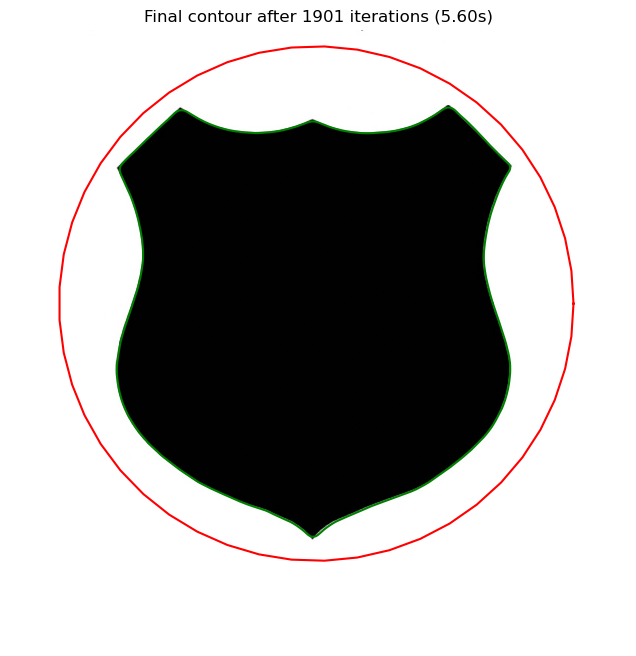

In [ ]:
# Configure snake parameters
shield_params = SnakeParams(
    alpha=2500.0,  # Stronger continuity
    beta=1000.0,  # Stronger curvature
    gamma=0.0015,  # Smaller time step
    sigma=3.0,  # Less blur
    kb=0.0,  # Weaker balloon force
    sb=100.0,  # More smoothing
    max_iter=1900,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=15,
    vfc_sigma=5.0,
)

# Create and evolve snake
shield_snake = Snake2D(shield, v_init, shield_params)
v_final, iters, duration = shield_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(shield, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

(800, 800)


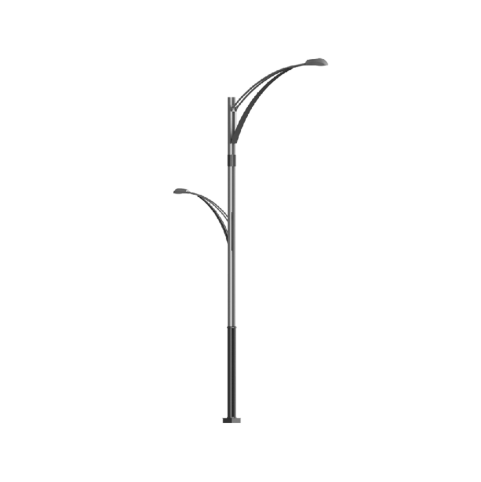

In [10]:
# Load and display image
poste1_image_path = "./tub-imgs/poste1.png"
poste1 = cv2.imread(poste1_image_path, 0)  # Read as grayscale
print(poste1.shape)
plt.figure(figsize=(6, 6))
plt.imshow(poste1, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (1101, 2)


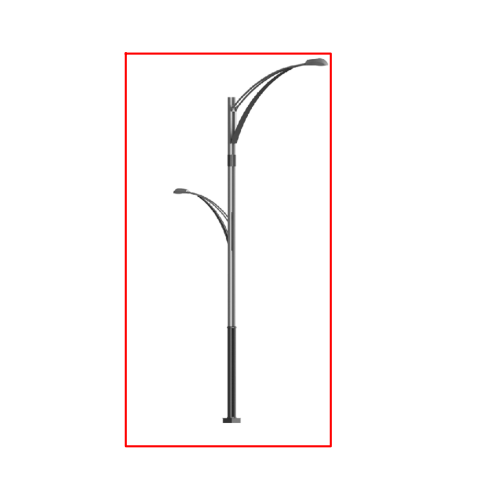

In [ ]:
initial_points2 = [
    [200, 75],
    [200, 755],
    [555, 755],
    [555, 75],
]

V_circle = init_circle((poste1.shape[1] // 2, poste1.shape[0] // 2), 360, num_points=50)
V_rect = init_rectangle(initial_points2, 50)

V_subdivided = subdivision(V_rect, k=2)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided
# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(poste1, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()

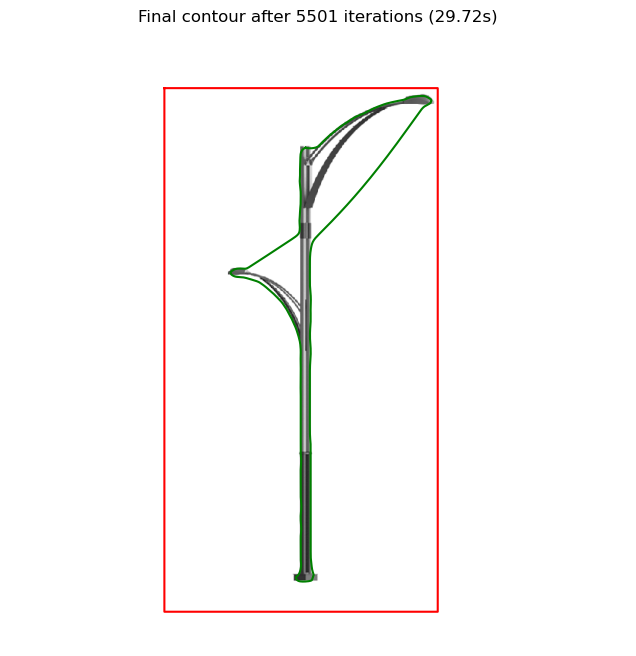

In [ ]:
# Configure snake parameters
poste1_params = SnakeParams(
    alpha=1800.0,  # Stronger continuity
    beta=1000.0,  # Stronger curvature
    gamma=0.002,  # Smaller time step
    sigma=5.0,  # Less blur
    kb=1.0,  # Weaker balloon force
    sb=10.0,  # More smoothing
    max_iter=5500,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=25,
    vfc_sigma=5.0,
)

# Create and evolve snake
poste1_snake = Snake2D(poste1, v_init, poste1_params)
v_final, iters, duration = poste1_snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(poste1, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

(800, 800)


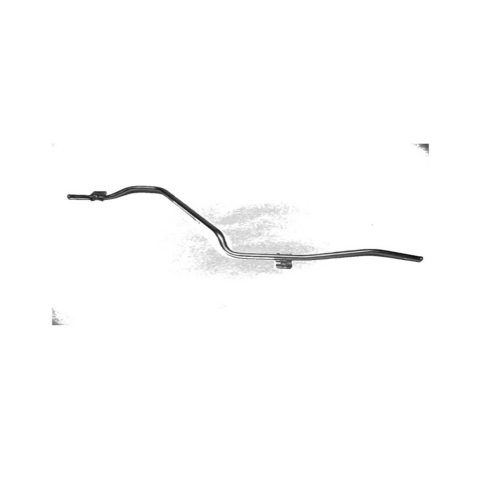

In [5]:
# Load and display image
tubimg1_image_path = "./tub-imgs/tubimg1.jpg"
tubimg1 = cv2.imread(tubimg1_image_path, 0)  # Read as grayscale
print(tubimg1.shape)
plt.figure(figsize=(6, 6))
plt.imshow(tubimg1, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (1101, 2)


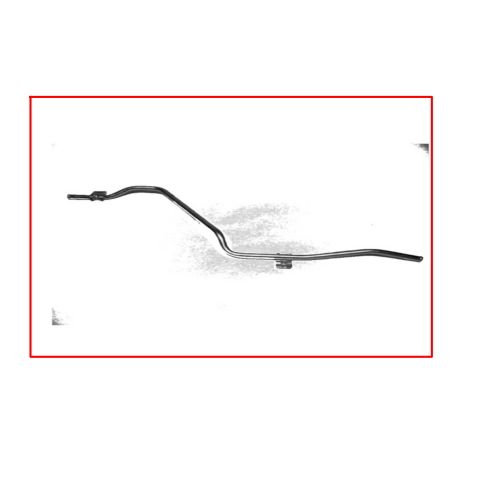

In [ ]:
initial_points2 = [
    [35, 150],
    [35, 600],
    [730, 600],
    [730, 150],
]

V_circle = init_circle(
    (tubimg1.shape[1] // 2, tubimg1.shape[0] // 2), 360, num_points=50
)
V_rect = init_rectangle(initial_points2, 50)

V_subdivided = subdivision(V_rect, k=2)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided
# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(tubimg1, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()

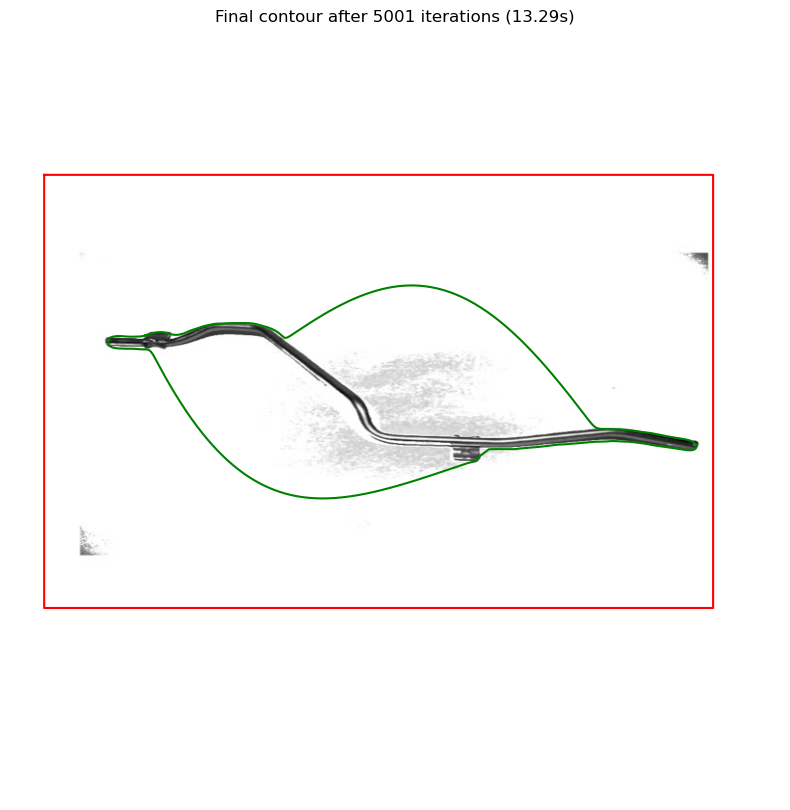

In [ ]:
# Configure snake parameters
tubimg1_params = SnakeParams(
    alpha=1500.0,  # Stronger continuity
    beta=2000.0,  # Stronger curvature
    gamma=0.002,  # Smaller time step
    sigma=5.0,  # Less blur
    kb=0.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=5000,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=25,
    vfc_sigma=5.0,
)

# Create and evolve snake
tubimg1_snake = Snake2D(tubimg1, v_init, tubimg1_params)
v_final, iters, duration = tubimg1_snake.evolve()

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(tubimg1, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

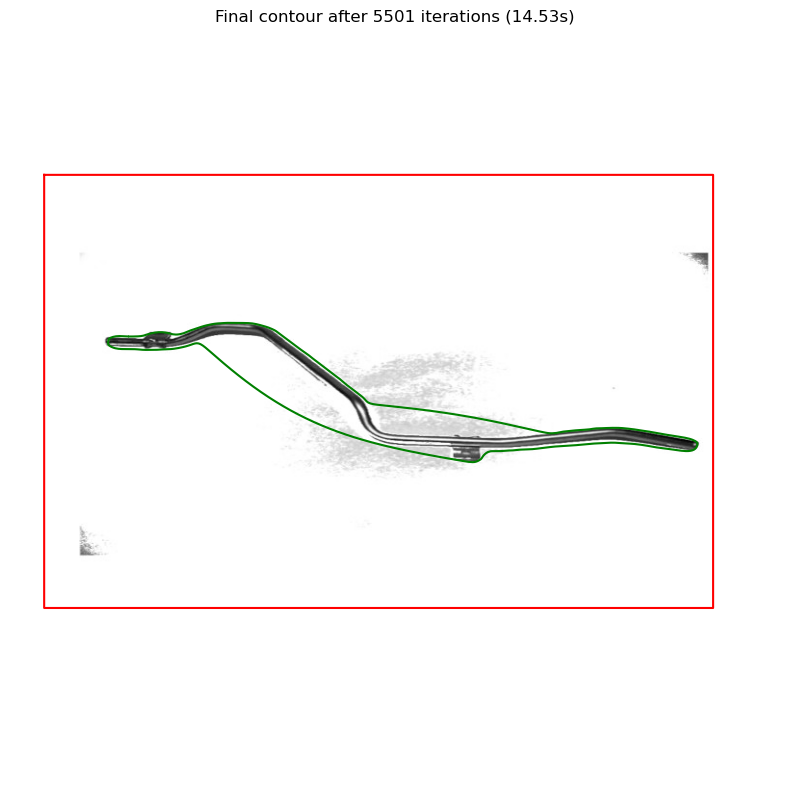

In [ ]:
# Configure snake parameters
tubimg1_params = SnakeParams(
    alpha=1500.0,  # Stronger continuity
    beta=2000.0,  # Stronger curvature
    gamma=0.002,  # Smaller time step
    sigma=5.0,  # Less blur
    kb=0.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=5500,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=25,
    vfc_sigma=5.85,
)

# Create and evolve snake
tubimg1_snake = Snake2D(tubimg1, v_init, tubimg1_params)
v_final, iters, duration = tubimg1_snake.evolve()

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(tubimg1, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

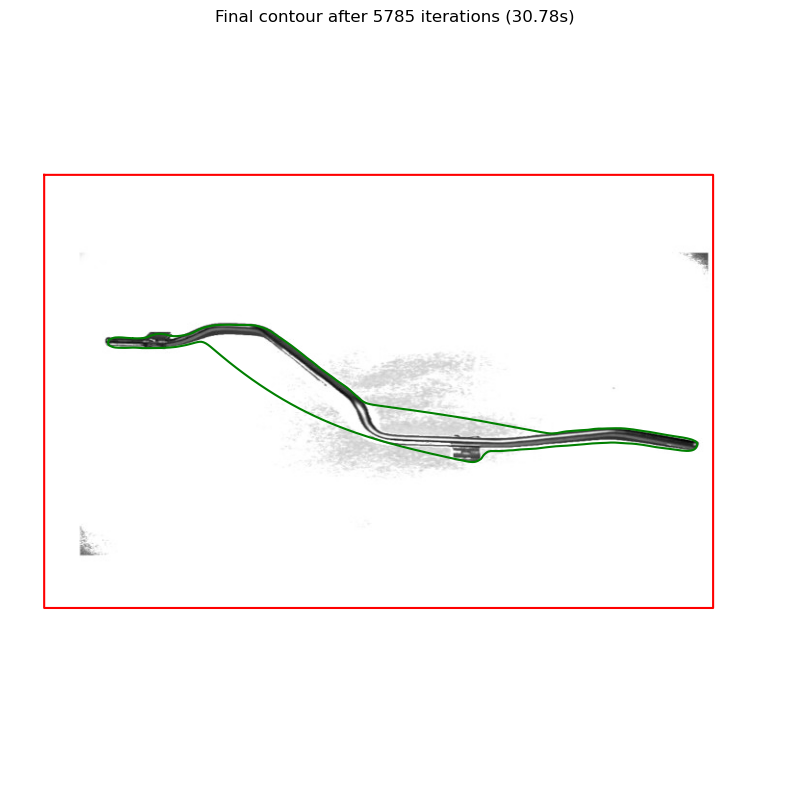

In [ ]:
# Configure snake parameters
tubimg1_params = SnakeParams(
    alpha=1600.0,  # Stronger continuity
    beta=2000.0,  # Stronger curvature
    gamma=0.0019,  # Smaller time step
    sigma=5.0,  # Less blur
    kb=-1.0,  # Weaker balloon force
    sb=7.0,  # More smoothing
    max_iter=5784,
    verbose=True,
    cubic_spline_refinement=True,
    vfc_ksize=25,
    vfc_sigma=5.9,
)

# Create and evolve snake
tubimg1_snake = Snake2D(tubimg1, v_init, tubimg1_params)
v_final, iters, duration = tubimg1_snake.evolve()

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(tubimg1, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()